In [1]:
# ! pip install --upgrade bottleneck

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
apt23 = pd.read_csv('data_yena/아파트(전월세)_실거래가_2023.csv', header=15, encoding='cp949')
apt24 = pd.read_csv('data_yena/아파트(전월세)_실거래가_2024.csv', header=15, encoding='cp949')

In [4]:
apt23_df = apt23[apt23['전월세구분']=='전세']
apt24_df = apt24[apt24['전월세구분']=='전세']

In [5]:
apt23_df['월세금(만원)'] = apt23_df['월세금(만원)'].str.replace(',', '').astype(int)
apt24_df['월세금(만원)'] = apt24_df['월세금(만원)'].str.replace(',', '').astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_19364\3222935364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['월세금(만원)'] = apt23_df['월세금(만원)'].str.replace(',', '').astype(int)
C:\Users\emily\AppData\Local\Temp\ipykernel_19364\3222935364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['월세금(만원)'] = apt24_df['월세금(만원)'].str.replace(',', '').astype(int)


In [6]:
apt23_df['보증금(만원)'] = apt23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
apt23_df['보증금(만원)'] = pd.to_numeric(apt23_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_19364\760281986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['보증금(만원)'] = apt23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_19364\760281986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['보증금(만원)'] = pd.to_numeric(apt23_df['보증금(만원)']).astype(int)


In [7]:
apt24_df['보증금(만원)'] = apt24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
apt24_df['보증금(만원)'] = pd.to_numeric(apt24_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_19364\3453946786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['보증금(만원)'] = apt24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_19364\3453946786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['보증금(만원)'] = pd.to_numeric(apt24_df['보증금(만원)']).astype(int)


In [8]:
apt23_df['계약년월'] = pd.to_datetime(apt23_df['계약년월'].astype(str), format='%Y%m')
apt24_df['계약년월'] = pd.to_datetime(apt24_df['계약년월'].astype(str), format='%Y%m')

C:\Users\emily\AppData\Local\Temp\ipykernel_19364\2180389127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['계약년월'] = pd.to_datetime(apt23_df['계약년월'].astype(str), format='%Y%m')
C:\Users\emily\AppData\Local\Temp\ipykernel_19364\2180389127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['계약년월'] = pd.to_datetime(apt24_df['계약년월'].astype(str), format='%Y%m')


In [9]:
apt23_df = apt23_df[apt23_df['계약년월']>='2023-06-01']
apt23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,2023-12-01,31,...,0,2,1999,동호로10길 30,202402~202602,신규,-,NaN,NaN,아파트
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,2023-12-01,31,...,0,20,1994,이촌로2가길 122,202403~202603,신규,-,NaN,NaN,아파트
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,0,7,2010,백범로 260,-,-,-,NaN,NaN,아파트
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,0,7,2010,백범로 260,202402~202602,신규,-,NaN,NaN,아파트
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,2023-12-01,31,...,0,14,2016,금호로 173,-,-,-,NaN,NaN,아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157615,157616,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,84.91,2023-06-01,1,...,0,6,1990,사당로17길 52,202307~202507,갱신,사용,"72,000",0,아파트
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,2023-06-01,1,...,0,13,1990,사당로17길 52,202308~202508,신규,-,NaN,NaN,아파트
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,0,39,2017,천호대로 1077,202308~202508,신규,-,NaN,NaN,아파트
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,0,39,2017,천호대로 1077,202308~202509,신규,-,NaN,NaN,아파트


In [10]:
apt23_df['구'] = apt23_df['시군구'].str.extract(r'(\S+구)')
apt23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,구
0,1,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,2023-12-01,31,...,2,1999,동호로10길 30,202402~202602,신규,-,NaN,NaN,아파트,중구
4,5,서울특별시 용산구 이촌동,395,395,0,대림,전세,59.22,2023-12-01,31,...,20,1994,이촌로2가길 122,202403~202603,신규,-,NaN,NaN,아파트,용산구
5,6,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,7,2010,백범로 260,-,-,-,NaN,NaN,아파트,용산구
6,7,서울특별시 용산구 효창동,274,274,0,효창파크푸르지오,전세,59.41,2023-12-01,31,...,7,2010,백범로 260,202402~202602,신규,-,NaN,NaN,아파트,용산구
9,10,서울특별시 성동구 금호동2가,1,1,0,신금호파크자이,전세,59.98,2023-12-01,31,...,14,2016,금호로 173,-,-,-,NaN,NaN,아파트,성동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157615,157616,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,84.91,2023-06-01,1,...,6,1990,사당로17길 52,202307~202507,갱신,사용,"72,000",0,아파트,동작구
157616,157617,서울특별시 동작구 사당동,169-8,169,8,대림(169-8),전세,125.40,2023-06-01,1,...,13,1990,사당로17길 52,202308~202508,신규,-,NaN,NaN,아파트,동작구
157620,157621,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,39,2017,천호대로 1077,202308~202508,신규,-,NaN,NaN,아파트,강동구
157621,157622,서울특별시 강동구 천호동,571,571,0,래미안강동팰리스,전세,59.98,2023-06-01,1,...,39,2017,천호대로 1077,202308~202509,신규,-,NaN,NaN,아파트,강동구


In [11]:
apt23_df['구'].value_counts()

구
강남구     8871
노원구     7644
송파구     7596
서초구     6454
강동구     5656
강서구     5437
양천구     5083
영등포구    3966
마포구     3904
은평구     3857
성동구     3741
구로구     3509
동작구     3382
성북구     3378
동대문구    2830
서대문구    2641
중랑구     2500
도봉구     2466
용산구     2155
관악구     2150
광진구     1888
중구      1252
금천구     1110
강북구     1097
종로구      753
Name: count, dtype: int64

In [12]:
apt24_df['구'] = apt24_df['시군구'].str.extract(r'(\S+구)')
apt24_df

C:\Users\emily\AppData\Local\Temp\ipykernel_19364\285812305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['구'] = apt24_df['시군구'].str.extract(r'(\S+구)')


,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,구
1,2,서울특별시 종로구 창신동,328-17,328,17,동대문,전세,28.80,2024-12-01,31,...,6,1966,지봉로 25,202502~202702,신규,-,NaN,NaN,아파트,종로구
3,4,서울특별시 용산구 이촌동,404,404,0,한가람,전세,114.96,2024-12-01,31,...,6,1998,이촌로65가길 23,202502~202702,신규,-,NaN,NaN,아파트,용산구
6,7,서울특별시 용산구 효창동,287,287,0,용산롯데캐슬센터포레,전세,59.79,2024-12-01,31,...,13,2019,백범로 313,202412~202612,신규,-,NaN,NaN,아파트,용산구
13,14,서울특별시 중구 신당동,842,842,0,약수하이츠,전세,84.88,2024-12-01,31,...,16,1999,동호로10길 30,202501~202701,신규,-,NaN,NaN,아파트,중구
14,15,서울특별시 중구 신당동,432-1957,432,1957,신신(2차),전세,59.98,2024-12-01,31,...,3,2001,동호로11자길 22,202502~202702,갱신,-,"22,000",0,아파트,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249749,249750,서울특별시 영등포구 여의도동,21-2,21,2,공작,전세,93.06,2024-01-01,1,...,9,1976,여의대로6길 17,202401~202601,갱신,-,"40,000",0,아파트,영등포구
249751,249752,서울특별시 성동구 하왕십리동,1071,1071,0,왕십리자이,전세,51.94,2024-01-01,1,...,14,2017,난계로 100,202411~202611,갱신,사용,"47,900",0,아파트,성동구
249756,249757,서울특별시 서대문구 북아현동,1009,1009,0,두산,전세,59.96,2024-01-01,1,...,12,1999,이화여대8길 62,202401~202501,갱신,-,"30,000",10,아파트,서대문구
249757,249758,서울특별시 송파구 장지동,847,847,0,송파파인타운6단지,전세,84.98,2024-01-01,1,...,15,2008,충민로6길 14,202402~202602,신규,-,NaN,NaN,아파트,송파구


In [13]:
apt24_df['구'].value_counts()

구
송파구     12229
강남구     12044
노원구     11391
강동구     10012
강서구      9851
서초구      8541
양천구      7282
영등포구     6987
마포구      6332
성동구      5761
성북구      5520
은평구      5433
동작구      5392
구로구      5174
동대문구     4605
서대문구     4238
중랑구      3795
도봉구      3777
관악구      3324
용산구      3261
광진구      2645
중구       1828
금천구      1774
강북구      1737
종로구       936
Name: count, dtype: int64

In [14]:
# 구별 거래건수 집계
gu_counts_23 = apt23_df['구'].value_counts()
gu_counts_24 = apt24_df['구'].value_counts()

# 합치기 후 결측값 처리 및 정수형 변환
combined = gu_counts_23.add(gu_counts_24, fill_value=0).astype(int)

# 시리즈 → 데이터프레임 변환
combined_df = combined.reset_index()
combined_df.columns = ['구', '거래건수']

# 거래건수 기준 정렬
combined_df = combined_df.sort_values(by='거래건수', ascending=False)

# 결과 출력
combined_df

,구,거래건수
0,강남구,20915
17,송파구,19825
8,노원구,19035
1,강동구,15668
3,강서구,15288
14,서초구,14995
18,양천구,12365
19,영등포구,10953
12,마포구,10236
15,성동구,9502


In [15]:
# ! pip install --upgrade openpyxl

In [16]:
seoul_map = pd.read_excel('D:/SDC_project/data_yena/서울시_행정동_좌표.xlsx')
seoul_map

,code,sido,gu,dong,lat,lng
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [17]:
seoul_map = seoul_map.rename(columns={'gu':'구','dong':'동','lat':'위도','lng':'경도'})
seoul_map

,code,sido,구,동,위도,경도
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [18]:
gu_coords_df = seoul_map[['구','위도','경도']]
combined_with_coords = pd.merge(combined_df, gu_coords_df, on=['구'], how='left')
combined_with_coords

,구,거래건수,위도,경도
0,강남구,20915,37.523807,127.026492
1,강남구,20915,37.511498,127.028552
2,강남구,20915,37.517353,127.037164
3,강남구,20915,37.530734,127.028461
4,강남구,20915,37.524399,127.050457
...,...,...,...,...
886,종로구,1689,37.610420,126.969837
887,종로구,1689,37.594148,126.964248
888,종로구,1689,37.600310,126.957773
889,종로구,1689,37.602696,126.961378


In [21]:
combined_with_coords.to_csv('combined_coords_apt.csv')

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

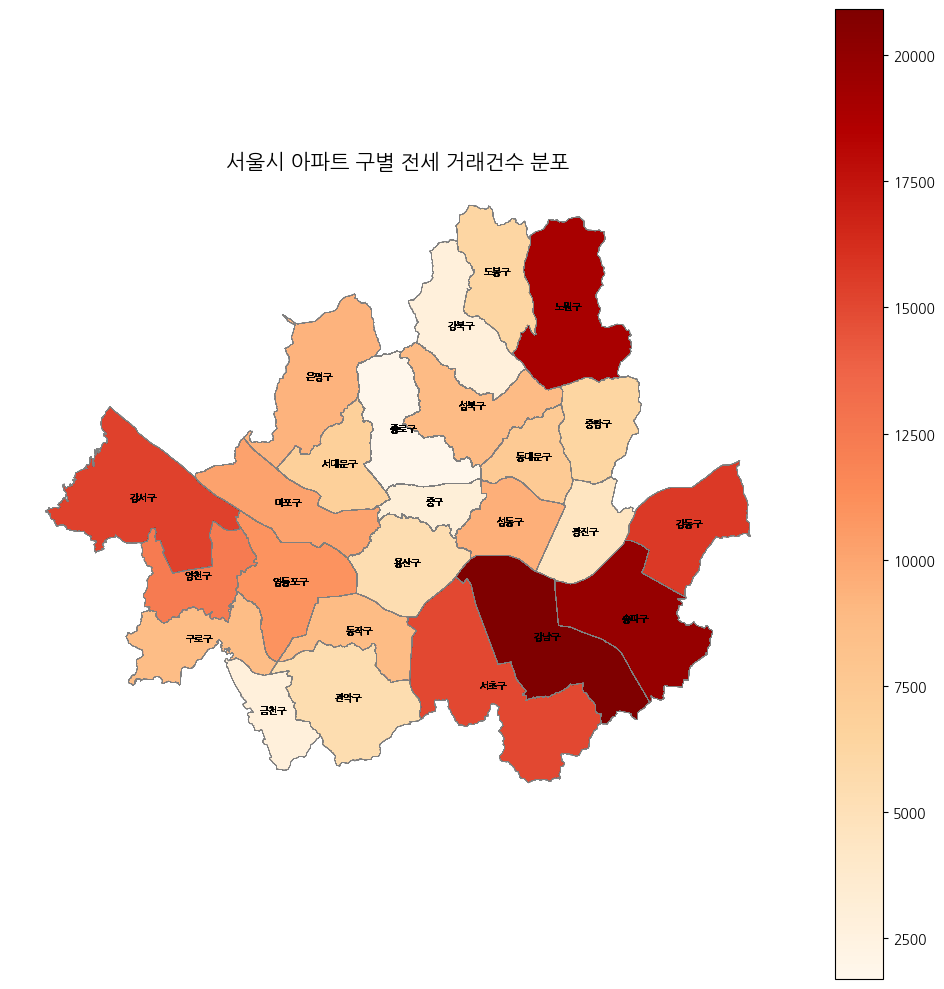

In [42]:
df = pd.read_csv('D:/SDC_project/data_yena/combined_coords_apt.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/data_yena/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.title('서울시 아파트 구별 전세 거래건수 분포', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.savefig('seoul_deals_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
seoul_gu

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.25, 964875.565 19..."
...,...,...,...,...
245,51790,Hwacheon-gun,화천군,"POLYGON ((1027779.614 2032000.017, 1027951.841..."
246,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((1046391.747 2032451.649, 10463..."
247,51810,Inje-gun,인제군,"POLYGON ((1041948.853 1995343.843, 1042054.076..."
248,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917..."
